In [1]:

import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from django.contrib import messages


In [3]:
df = pd.read_csv("ground_truth.csv")


In [4]:
df.head()

,filename,label
0,Image_1.jpg,0
1,Image_2.jpg,1
2,Image_3.jpg,0
3,Image_4.jpg,1
4,Image_5.jpg,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  7828 non-null   object
 1   label     7828 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 122.4+ KB


In [6]:
df.isnull().sum()

filename    0
label       0
dtype: int64

<a id = '2.0'> </a>

<a id='3.1'>

In [7]:
# we want to make sure that the answers are limited to boolean-like values
columns_to_print = ['filename','label'
                    ]

for column in columns_to_print:
    print(f"{column}:")
    print(df[column].value_counts())
    print() 

filename:
filename
Image_1.jpg       1
Image_5230.jpg    1
Image_5228.jpg    1
Image_5227.jpg    1
Image_5226.jpg    1
                 ..
Image_2605.jpg    1
Image_2604.jpg    1
Image_2603.jpg    1
Image_2602.jpg    1
Image_7828.jpg    1
Name: count, Length: 7828, dtype: int64

label:
label
0    3085
2    2062
1    1416
3    1265
Name: count, dtype: int64



### Category Data Encoding

In [8]:
df['label'].value_counts()

label
0    3085
2    2062
1    1416
3    1265
Name: count, dtype: int64

In [9]:
# df["salary"]=df["salary"].str.replace("medium","1")
# df["salary"]=df["salary"].str.replace("low","0")
# df["salary"]=df["salary"].str.replace("high","2")

# df["salary"]=df["salary"].astype("int32")

In [10]:
df.to_csv('ground_truth.csv', index=False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7828 entries, 0 to 7827
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  7828 non-null   object
 1   label     7828 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 122.4+ KB


In [12]:
df.label.value_counts()

label
0    3085
2    2062
1    1416
3    1265
Name: count, dtype: int64

In [ ]:
# df.to_csv('mentalh.csv',index =False)

In [13]:
X= df.drop('label',axis = 1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y ,random_state=42)


In [33]:

import pandas as pd
dfmin= df[df['turnover'] == 1]
dfmax= df[df['turnover'] == 0]
from sklearn.utils import resample
dfminu = resample(dfmin, replace=True, n_samples =1000,random_state=123)
dfmaxd = resample(dfmax, replace=True, n_samples =1000,random_state=123)
df_dsampled = pd.concat([dfminu,dfmaxd])
df_dsampled['turnover'].value_counts()

# Now, X_oversample and y_oversample should be of the same type as X and y, respectively

X=df_dsampled.drop("turnover",axis=1)
# dependent feature
y=df_dsampled["turnover"]

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y ,random_state=42)

In [34]:
df_dsampled.to_csv('HR_comma.csv',index=False)

In [35]:
df_dsampled['turnover'].value_counts()


turnover
1    1000
0    1000
Name: count, dtype: int64

In [36]:

# from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

#ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [38]:
# decision Tree


DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
from sklearn.model_selection import cross_val_score

# y_predict = DT.predict(X_test)
print('*'*20)

# prediction
train_pred=DT.predict(X_train)
test_pred= DT.predict(X_test)
print('*'*20)
# accuracy
print('Train accuracy:' , accuracy_score(y_train,train_pred))
print('Test accuracy:' , accuracy_score(y_test,test_pred))

print('*'*20)
 # cross validation   
score= cross_val_score(DT,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
#  prediction Summary by species
print(classification_report(y_test, test_pred))

print('*'*20)
# Accuracy score
DT_SC = accuracy_score(test_pred,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

print('*'*20)



********************
********************
Train accuracy: 1.0
Test accuracy: 0.95
********************
[0.9575 0.9425 0.9525 0.93   0.94  ]
0.9445
********************
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       300
           1       0.94      0.96      0.95       300

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

********************
95.0% Accurate
********************


In [39]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.9733333333333334
train accuracy: 1.0
********************
0.966
********************
********************
97.33% Accurate


In [40]:

# logistic regression

LR = LogisticRegression()
LR.fit(X_train, y_train)


# prediction
train_prediction= LR.predict(X_train)
test_prediction= LR.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(LR,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


lr_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(lr_HSC*100,2)}% Accurate")

********************
test accuracy: 0.79
train accuracy: 0.765
********************
0.7805
********************
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       300
           1       0.94      0.96      0.95       300

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

********************
79.0% Accurate


In [41]:
#  XGBoost

XGB = XGBClassifier()
XGB.fit(X_train, y_train)

# prediction
train_prediction= XGB.predict(X_train)
test_prediction= XGB.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(XGB,X,y,cv=5)
print(score.mean())
print('*'*20)

print(classification_report(y_test,test_pred))

print('*'*20)


XGB_HSC = accuracy_score(y_test,test_prediction)
print(f"{round(XGB_HSC*100,2)}% Accurate")

********************
test accuracy: 0.96
train accuracy: 1.0
********************
0.9545
********************
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       300
           1       0.94      0.96      0.95       300

    accuracy                           0.95       600
   macro avg       0.95      0.95      0.95       600
weighted avg       0.95      0.95      0.95       600

********************
96.0% Accurate


In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Create AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    # Add other hyperparameters you want to tune
}

# Create GridSearchCV object
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_ada_model = grid_search.best_estimator_

# Prediction
train_prediction = best_ada_model.predict(X_train)
test_prediction = best_ada_model.predict(X_test)

# Evaluation
print('*'*20)
print('Test accuracy:', accuracy_score(y_test, test_prediction))
print('Train accuracy:', accuracy_score(y_train, train_prediction))
print('*'*20)

# Cross-validation score
best_score = grid_search.best_score_
print(f"Best Cross-validation Score: {best_score:.4f}")
print('*'*20)

# Prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
ada_h = accuracy_score(test_prediction, y_test)
print(f"{round(ada_h*100, 2)}% Accurate")


Best Parameters: {'learning_rate': 1.0, 'n_estimators': 200}
********************
Test accuracy: 0.935
Train accuracy: 0.9542857142857143
********************
Best Cross-validation Score: 0.9357
********************
********************
93.5% Accurate


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
# random forest

gbc=GradientBoostingClassifier(random_state=42)
gbc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= gbc.predict(X_train)
test_prediction= gbc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(gbc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
gbc_h = accuracy_score(test_prediction,y_test)
print(f"{round(gbc_h*100,2)}% Accurate")

********************
********************
test accuracy: 0.95
train accuracy: 0.9692857142857143
********************
0.9480000000000001
********************
********************
95.0% Accurate


In [44]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Convert X_train and X_test to NumPy arrays
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_np, y_train)

# Prediction
train_prediction = knn_model.predict(X_train_np)
test_prediction = knn_model.predict(X_test_np)

# Evaluation
print('*'*20)
from sklearn.metrics import accuracy_score
print('Test accuracy:', accuracy_score(y_test, test_prediction))
print('Train accuracy:', accuracy_score(y_train, train_prediction))

print('*'*20)
result = confusion_matrix(y_test, test_prediction)
print("Confusion Matrix:")
print(result)

print('*'*20)
# Prediction Summary by species
print(classification_report(y_test, test_prediction))

print('*'*20)
# Accuracy score
Knn_SC = accuracy_score(test_prediction, y_test)
print(f"{round(Knn_SC*100, 2)}% Accurate")


********************
Test accuracy: 0.875
Train accuracy: 0.9071428571428571
********************
Confusion Matrix:
[[244  56]
 [ 19 281]]
********************
              precision    recall  f1-score   support

           0       0.93      0.81      0.87       300
           1       0.83      0.94      0.88       300

    accuracy                           0.88       600
   macro avg       0.88      0.88      0.87       600
weighted avg       0.88      0.88      0.87       600

********************
87.5% Accurate


In [45]:
score = [DT_SC,RF_SC,lr_HSC,Knn_SC,XGB_HSC,ada_h,gbc_h]
Models = pd.DataFrame({
    'Model': ["Decision Tree","Random Forest", "Logistic Regression",'Knn','XGBoost','AdaBoost',"GradientBoostingClassifier"],
    'Score': score})
Models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.973333
4,XGBoost,0.960000
0,Decision Tree,0.950000
6,GradientBoostingClassifier,0.950000
5,AdaBoost,0.935000
3,Knn,0.875000
2,Logistic Regression,0.790000


In [46]:

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)

# Get feature importance scores
feature_importances = rfc.feature_importances_

# Get the names of the features from your dataset
imp_feature=pd.DataFrame(index=X.columns,data=feature_importances,columns=['feature importance'])
imp_feature
# Create a DataFrame with feature names and their corresponding importances


,feature importance
satisfaction,0.306464
evaluation,0.120752
projectCount,0.137889
averageMonthlyHours,0.153182
yearsAtCompany,0.241759
workAccident,0.006774
promotion,0.002473
department,0.018041
salary,0.012665


In [47]:
imp_feature=imp_feature[imp_feature['feature importance']>0.04]
b=imp_feature.sort_values('feature importance')
b.index

Index(['evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany',
       'satisfaction'],
      dtype='object')

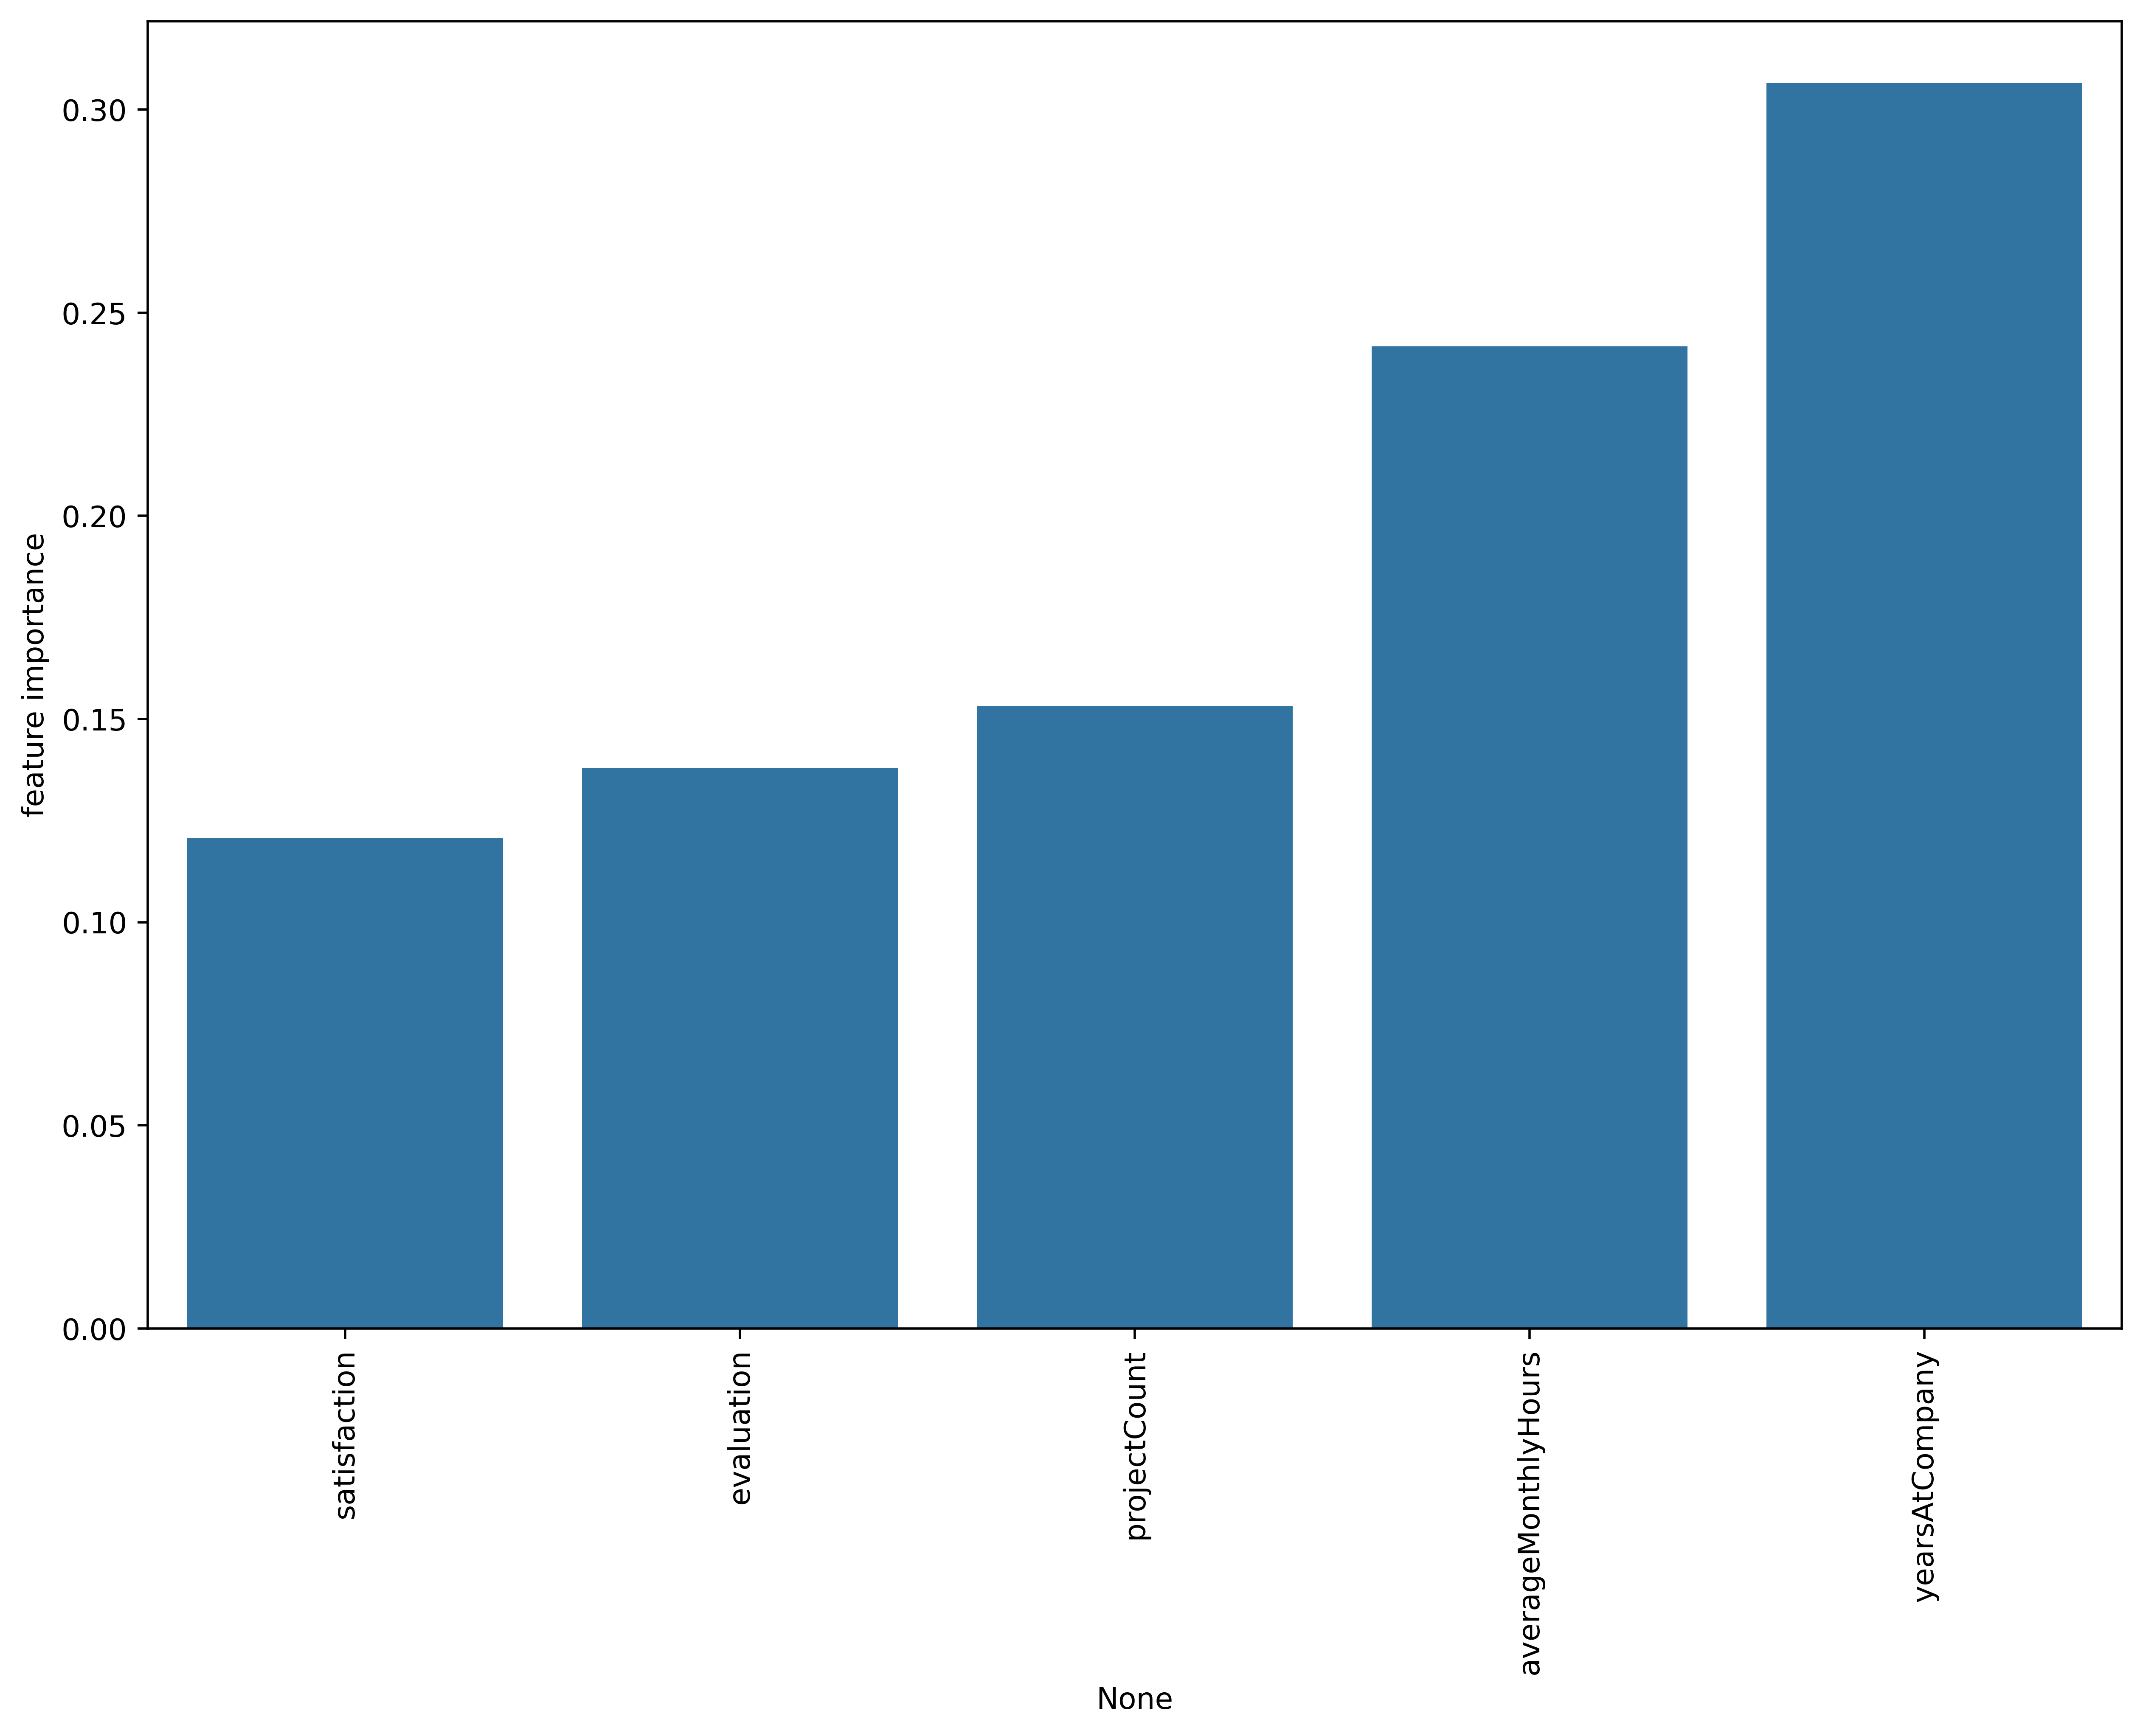

In [48]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()

In [51]:
X=X[['evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany',
       'satisfaction']]

In [52]:

import pandas as pd


from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [56]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train,y_train)
print('*'*20)

# prediction
train_prediction= rfc.predict(X_train)
test_prediction= rfc.predict(X_test)
print('*'*20)

# evaluation
from sklearn.metrics import accuracy_score
print('test accuracy:',accuracy_score(y_test,test_prediction))
print('train accuracy:',accuracy_score(y_train,train_prediction))
print('*'*20)

# cross validation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(rfc,X,y,cv=5)
print(score.mean())
print('*'*20)

#  prediction Summary by species
# print(classification_report(y_test, test_prediction))
print('*'*20)

# Accuracy score
RF_SC = accuracy_score(test_prediction,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")

********************
********************
test accuracy: 0.97
train accuracy: 1.0
********************
0.9640000000000001
********************
********************
97.0% Accurate


In [57]:
import pickle
#save the model
model = rfc  # Your machine learning model object
file_path = 'random.pkl'  # Path to the file where you want to save the model

with open(file_path, 'wb') as file:
    pickle.dump(model, file)


In [58]:
# load the model
import pickle

file_path = 'random.pkl'  # Path to the saved model file

with open(file_path, 'rb') as file:
    loaded_model = pickle.load(file)

In [59]:
X_train


,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,satisfaction
14865,0.89,7,308,4,0.10
12268,0.56,2,156,3,0.38
662,0.89,5,274,6,0.78
14539,0.85,6,266,4,0.10
920,0.45,2,160,3,0.37
...,...,...,...,...,...
11333,0.94,3,144,3,0.49
2438,0.63,3,273,3,0.88
3601,0.79,4,192,4,0.72
12766,0.81,5,227,5,0.75


In [77]:
X=X[['evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany',
       'satisfaction']]

In [80]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Load the CSV file
df = pd.read_csv('HR_comma.csv')

X=X[['evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany',
       'satisfaction']]

# Step 3: Handle categorical variables (convert 'department' to dummy variables)
# df = pd.get_dummies(df, columns=['department'], drop_first=True)

# Step 4: Define features (X) and target (y)
# X = df.drop('turnover', axis=1)  # All features except 'turnover'
y = df['turnover']               # The target variable

# Step 5: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 6: Scale the data (SVM performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Initialize the Linear Support Vector Classifier (LSVM)
lsvm = SVC(kernel='linear')  # Linear kernel for LSVM

# Step 8: Train the model
lsvm.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = lsvm.predict(X_test)

# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print(classification_report(y_test, y_pred))


Accuracy: 77.33%
              precision    recall  f1-score   support

           0       0.82      0.70      0.75       298
           1       0.74      0.85      0.79       302

    accuracy                           0.77       600
   macro avg       0.78      0.77      0.77       600
weighted avg       0.78      0.77      0.77       600



['evaluation', 'projectCount', 'averageMonthlyHours', 'yearsAtCompany',
       'satisfaction']
       [0.56,2,141,3,0.44]

In [81]:
predictions = lsvm.predict([[0.56,2,141,3,0.44]])
print(predictions)

[1]


<a id = '5'></a>

<a id = '5.1'>
    

<a id = '5.3'>